<a href="https://colab.research.google.com/github/simonefmr/mvp_pucrio/blob/main/Sprint2_MVP_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pós Graduação Ciência de Dados - PUC Rio**
# **MVP Sprint II A - Machine Learning**

## *Análise de Churn de uma empresa de telefonia - Idendificação de possíveis cancelamentos nos serviços*

## Aluna: Simone de Fátima Marques Ramos

In [111]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Carga do Dataset

In [112]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/simonefmr/mvp_pucrio/main/Customer-Churn.csv"

# Lê o arquivo
dataset = pd.read_csv(url, sep=',')

# Dimensões do dataset
dataset.shape

(7043, 18)

In [113]:
dataset.columns

Index(['Maior65Anos', 'Conjuge', 'Dependentes', 'MesesDeContrato',
       'TelefoneFixo', 'VariasLinhasTelefonicas', 'ServicoDeInternet',
       'SegurancaOnline', 'BackupOnline', 'SeguroNoDispositivo',
       'SuporteTecnico', 'TVaCabo', 'StreamingDeFilmes', 'TipoDeContrato',
       'PagamentoOnline', 'FormaDePagamento', 'ContaMensal', 'Churn'],
      dtype='object')

In [114]:
# Mostra as 5 primeiras linhas do dataset
dataset.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [115]:
#modificação de forma manual
traducao_dic = {'Sim': 1,
                'Nao': 0}

dataset['Conjuge'] = dataset['Conjuge'].replace(traducao_dic)

dataset['Dependentes'] = dataset['Dependentes'].replace(traducao_dic)

dataset['TelefoneFixo'] = dataset['TelefoneFixo'].replace(traducao_dic)

dataset['PagamentoOnline'] = dataset['PagamentoOnline'].replace(traducao_dic)

dataset['Churn'] = dataset['Churn'].replace(traducao_dic)

dataset.head(5)


,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,1,0,1,0,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,1,ChequeDigital,29.85,0
1,0,0,0,34,1,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,0,ChequePapel,56.95,0
2,0,0,0,2,1,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,1,ChequePapel,53.85,1
3,0,0,0,45,0,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,0,DebitoEmConta,42.30,0
4,0,0,0,2,1,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,1,ChequeDigital,70.70,1


In [116]:
#transformação pelo get_dummies
dummie_dados = pd.get_dummies(dataset.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'],
                axis=1))

#junção dos dados trasformados com os que já tinhamos
dataset_final = pd.concat([dataset, dummie_dados], axis=1)

dataset_final

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,0,1,0,1,0,SemServicoTelefonico,DSL,Nao,Sim,Nao,...,1,0,0,0,1,0,0,1,0,0
1,0,0,0,34,1,Nao,DSL,Sim,Nao,Sim,...,1,0,0,0,0,1,0,0,1,0
2,0,0,0,2,1,Nao,DSL,Sim,Sim,Nao,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,45,0,SemServicoTelefonico,DSL,Sim,Nao,Sim,...,1,0,0,0,0,1,0,0,0,1
4,0,0,0,2,1,Nao,FibraOptica,Nao,Nao,Nao,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,Sim,DSL,Sim,Nao,Sim,...,0,0,1,0,0,1,0,0,1,0
7039,0,1,1,72,1,Sim,FibraOptica,Nao,Sim,Sim,...,0,0,1,0,0,1,1,0,0,0
7040,0,1,1,11,0,SemServicoTelefonico,DSL,Sim,Nao,Nao,...,1,0,0,0,1,0,0,1,0,0
7041,1,1,0,4,1,Sim,FibraOptica,Nao,Nao,Nao,...,1,0,0,0,1,0,0,0,1,0


### Tratamento de Missings

In [117]:
# verificando nulls no dataset
dataset_final.isnull().sum()

Maior65Anos                                     0
Conjuge                                         0
Dependentes                                     0
MesesDeContrato                                 0
TelefoneFixo                                    0
VariasLinhasTelefonicas                         0
ServicoDeInternet                               0
SegurancaOnline                                 0
BackupOnline                                    0
SeguroNoDispositivo                             0
SuporteTecnico                                  0
TVaCabo                                         0
StreamingDeFilmes                               0
TipoDeContrato                                  0
PagamentoOnline                                 0
FormaDePagamento                                0
ContaMensal                                     0
Churn                                           0
Maior65Anos                                     0
MesesDeContrato                                 0


Não foram identificados valores nulos para tratamento.

In [118]:
# Descartando colunas que foram categorizadas pelo Get Dummies

dataset_final = dataset_final.drop('VariasLinhasTelefonicas', axis=1)
dataset_final = dataset_final.drop('ServicoDeInternet', axis=1)
dataset_final = dataset_final.drop('SegurancaOnline', axis=1)
dataset_final = dataset_final.drop('BackupOnline', axis=1)
dataset_final = dataset_final.drop('SeguroNoDispositivo', axis=1)
dataset_final = dataset_final.drop('SuporteTecnico', axis=1)
dataset_final = dataset_final.drop('TVaCabo', axis=1)
dataset_final = dataset_final.drop('StreamingDeFilmes', axis=1)
dataset_final = dataset_final.drop('TipoDeContrato', axis=1)
dataset_final = dataset_final.drop('FormaDePagamento', axis=1)

In [119]:
# Busco informações sobre contagem de não nulos e tipo de cada atributo

dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Maior65Anos                                   7043 non-null   int64  
 1   Conjuge                                       7043 non-null   int64  
 2   Dependentes                                   7043 non-null   int64  
 3   MesesDeContrato                               7043 non-null   int64  
 4   TelefoneFixo                                  7043 non-null   int64  
 5   PagamentoOnline                               7043 non-null   int64  
 6   ContaMensal                                   7043 non-null   float64
 7   Churn                                         7043 non-null   int64  
 8   Maior65Anos                                   7043 non-null   int64  
 9   MesesDeContrato                               7043 non-null   i

In [120]:
# Converter todas as colunas do tipo uint8 para int
dataset_final = dataset_final.astype({'VariasLinhasTelefonicas_Nao': int,
                                      'VariasLinhasTelefonicas_Sim': int,
                                      'VariasLinhasTelefonicas_SemServicoTelefonico': int,
                                      'ServicoDeInternet_FibraOptica': int,
                                      'ServicoDeInternet_Nao': int,
                                      'ServicoDeInternet_DSL': int,
                                      'SegurancaOnline_Nao': int,
                                      'SegurancaOnline_SemServicoDeInternet': int,
                                      'SegurancaOnline_Sim': int,
                                      'BackupOnline_Nao': int,
                                      'BackupOnline_SemServicoDeInternet': int,
                                      'BackupOnline_Sim': int,
                                      'SeguroNoDispositivo_Nao': int,
                                      'SeguroNoDispositivo_SemServicoDeInternet': int,
                                      'SeguroNoDispositivo_Sim': int,
                                      'SuporteTecnico_Nao': int,
                                      'SuporteTecnico_SemServicoDeInternet': int,
                                      'SuporteTecnico_Sim': int,
                                      'TVaCabo_Nao': int,
                                      'TVaCabo_SemServicoDeInternet': int,
                                      'TVaCabo_Sim': int,
                                      'StreamingDeFilmes_Nao': int,
                                      'StreamingDeFilmes_SemServicoDeInternet': int,
                                      'StreamingDeFilmes_Sim': int,
                                      'TipoDeContrato_DoisAnos': int,
                                      'TipoDeContrato_Mensalmente': int,
                                      'TipoDeContrato_UmAno': int,
                                      'FormaDePagamento_CartaoDeCredito': int,
                                      'FormaDePagamento_ChequeDigital': int,
                                      'FormaDePagamento_ChequePapel': int,
                                      'FormaDePagamento_DebitoEmConta': int})

## Separação em conjunto de treino e conjunto de teste

In [121]:
from sklearn.model_selection import train_test_split

X = dataset_final.drop('Churn', axis=1)  # DataFrame com todas as colunas, exceto "Churn"
y = dataset_final['Churn']  # Coluna "Churn" como a coluna target

# Divisão do conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

## Modelagem e Inferência

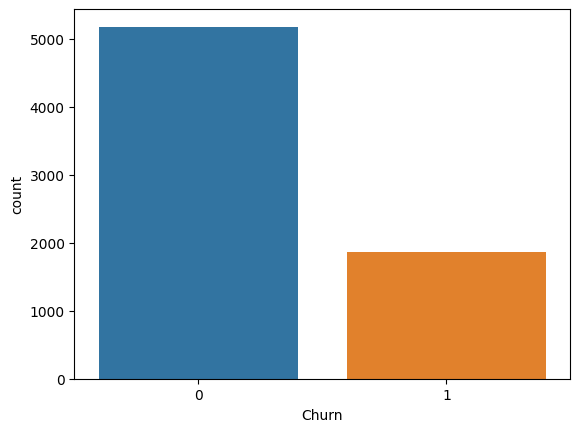

In [122]:
#variável target está desbalanceada
import seaborn as sns
%matplotlib inline
ax = sns.countplot(x='Churn', data=dataset_final)

In [124]:
#biblioteca para balancear os dados utilizando over_sampling
from imblearn.over_sampling import SMOTE

# dividindo os dados em caracteristicas e target
X = dataset_final.drop('Churn', axis = 1)
y = dataset_final['Churn']

smt = SMOTE(random_state=42)
X, y = smt.fit_resample(X, y)

#junção dos dados balanceados
dataset_final = pd.concat([X, y], axis=1)

#verificação 1 - junção dos dados
dataset_final.head(2)

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,PagamentoOnline,ContaMensal,Maior65Anos,MesesDeContrato,ContaMensal,...,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,0,1,0,1,0,1,29.85,0,1,29.85,...,0,0,0,1,0,0,1,0,0,0
1,0,0,0,34,1,0,56.95,0,34,56.95,...,0,0,0,0,1,0,0,1,0,0


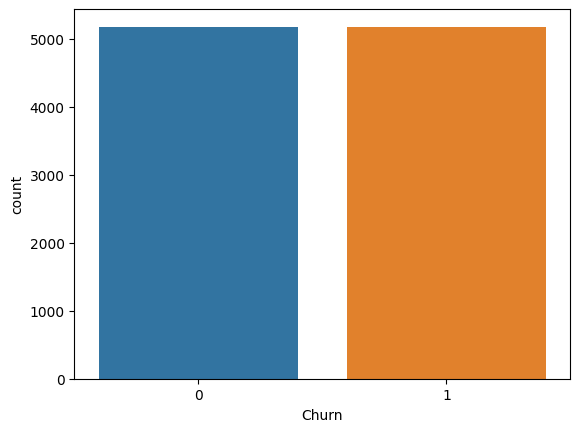

In [125]:
#verificação 2 - balanceamento
ax = sns.countplot(x='Churn', data=dataset_final)

### Criação e avaliação de modelos: linha base

LR: 0.798541 (0.013099)
KNN: 0.765000 (0.012224)
CART: 0.731801 (0.016819)
NB: 0.689034 (0.018002)
SVM: 0.786299 (0.017585)
Bagging: 0.783282 (0.014023)
RF: 0.779728 (0.015700)
ET: 0.767659 (0.016619)
Ada: 0.798546 (0.010510)
GB: 0.801387 (0.011818)
Voting: 0.796237 (0.015111)


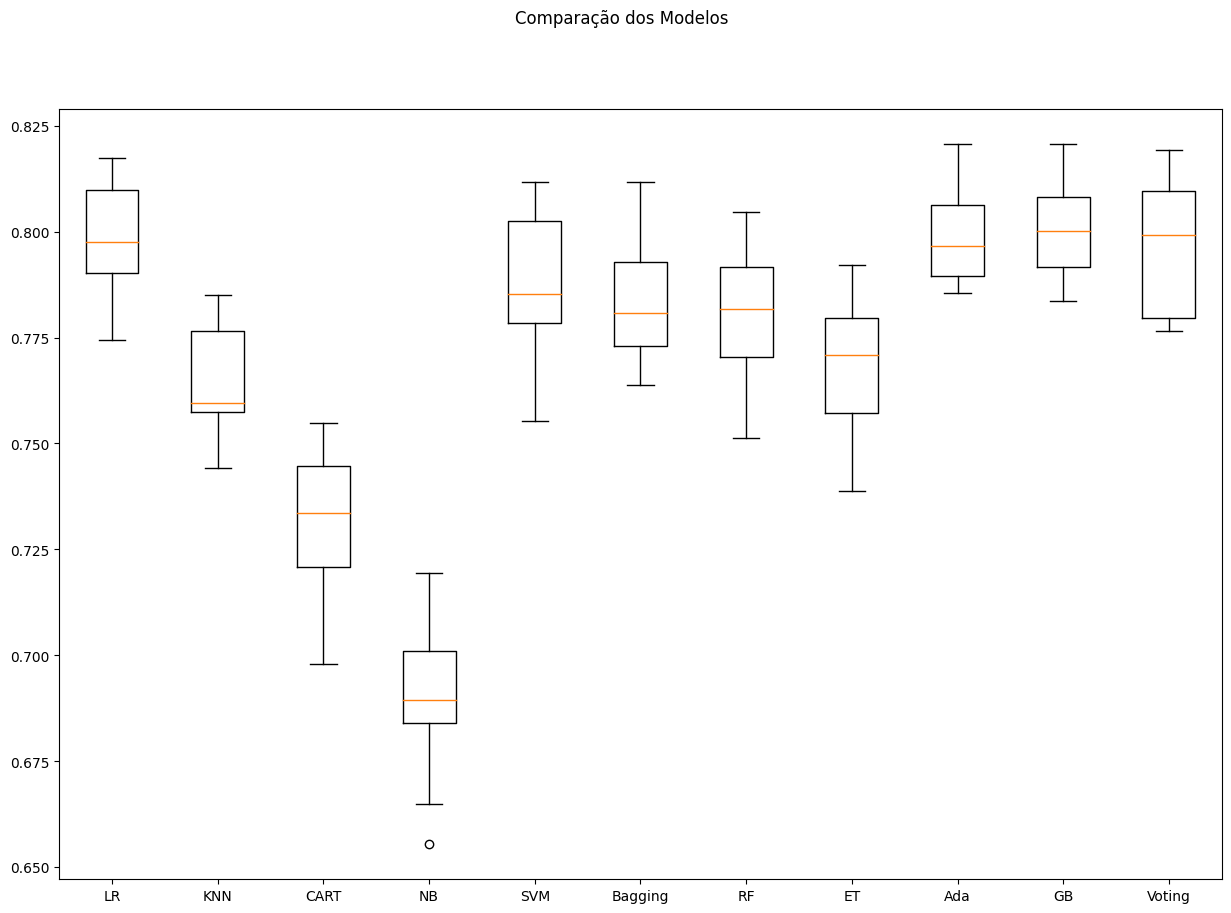

In [129]:
SEED = 42
np.random.seed(SEED) # definindo uma semente global
num_particoes = 10
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=SEED)

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [132]:
from sklearn.metrics import get_scorer_names

scorer_names = get_scorer_names()

print(scorer_names)

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weight

LR: 0.534473 (0.033261)
KNN: 0.492372 (0.030086)
CART: 0.521509 (0.044092)
NB: 0.847181 (0.033808)
SVM: 0.384179 (0.040379)
Bagging: 0.483149 (0.034501)
RF: 0.457858 (0.019258)
ET: 0.448973 (0.029035)
Ada: 0.525128 (0.031959)
GB: 0.513904 (0.020628)
Voting: 0.468715 (0.039448)


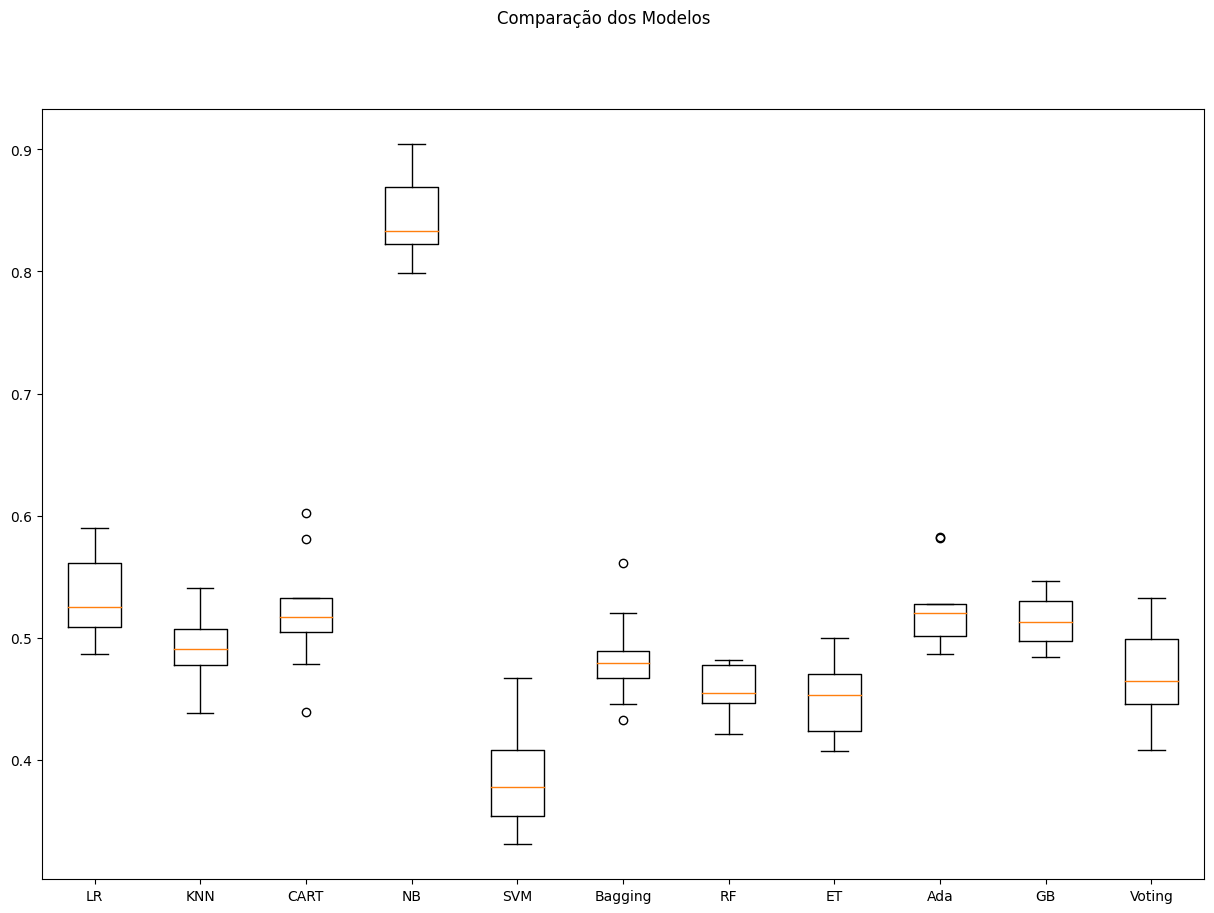

In [133]:
SEED = 42
np.random.seed(SEED) # definindo uma semente global
num_particoes = 10
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=SEED)

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()